<a href="https://colab.research.google.com/github/Blackout002/VOIS_AICTE_Oct2025_Minor-Project_Subramanya-Deshik/blob/main/AIRBNB_Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **Airbnb Hotel Booking Analysis**
This notebook follows the VOIS project guidelines for **AIRBNB Hotel Booking Analysis.**

**How to use:**

* Place your dataset file named airbnb_hotel_booking.csv in the same folder as this notebook. If you don't have the file, the notebook will run with a small synthetic sample so you can see the workflow.
* Run all cells from top to bottom.
---
**What this notebook contains:**

* Data loading
* Data preview
* Cleaning & preprocessing
* Exploratory Data Analysis (EDA)
* Visualizations (matplotlib)
* Insights and export

In [ ]:
# 1. Setup: imports and global settings
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Make plots appear inline (Jupyter)
%matplotlib inline

# Create output folder for saved images and cleaned data
OUT_DIR = '/mnt/data/vois_airbnb_outputs'
os.makedirs(OUT_DIR, exist_ok=True)

print('Output directory:', OUT_DIR)


Output directory: /mnt/data/vois_airbnb_outputs


In [ ]:

# 2. Load dataset (tries to read 'airbnb_hotel_booking.csv').
# If file not found, create a synthetic sample dataset so the notebook cells can run end-to-end.
DATA_PATH = 'airbnb_hotel_booking.csv'

if os.path.exists(DATA_PATH):
    df = pd.read_csv(DATA_PATH)
    print('Loaded dataset from', DATA_PATH)
else:
    print(f"File '{DATA_PATH}' not found. Creating a synthetic sample dataset to demonstrate the workflow.")
    rng = np.random.default_rng(42)
    n = 300
    df = pd.DataFrame({
        'id': np.arange(1, n+1),
        'city': rng.choice(['CityA', 'CityB', 'CityC'], size=n, p=[0.5,0.3,0.2]),
        'room_type': rng.choice(['Entire home/apt','Private room','Shared room'], size=n, p=[0.6,0.3,0.1]),
        'price': rng.integers(800, 8000, size=n),
        'minimum_nights': rng.integers(1, 14, size=n),
        'number_of_reviews': rng.integers(0, 200, size=n),
        'reviews_per_month': np.round(rng.uniform(0,5,size=n),2),
        'availability_365': rng.integers(0,365,size=n),
        'last_review': pd.to_datetime('2025-01-01') - pd.to_timedelta(rng.integers(0,365,size=n), unit='d'),
        'host_since': pd.to_datetime('2018-01-01') - pd.to_timedelta(rng.integers(0,2000,size=n), unit='d'),
        'neighbourhood_group': rng.choice(['A','B','C'], size=n)
    })
    # Save synthetic CSV so user can inspect it
    df.to_csv(os.path.join(OUT_DIR, 'synthetic_airbnb_sample.csv'), index=False)
    print('Saved synthetic sample to', os.path.join(OUT_DIR, 'synthetic_airbnb_sample.csv'))

# Show basic info
print('Dataset shape:', df.shape)
df.head()

File 'airbnb_hotel_booking.csv' not found. Creating a synthetic sample dataset to demonstrate the workflow.
Saved synthetic sample to /mnt/data/vois_airbnb_outputs/synthetic_airbnb_sample.csv
Dataset shape: (300, 11)


,id,city,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,last_review,host_since,neighbourhood_group
0,1,CityB,Private room,7128,7,11,3.34,321,2024-03-24,2014-07-09,B
1,2,CityA,Entire home/apt,4238,4,93,0.65,290,2024-05-01,2016-07-18,B
2,3,CityC,Entire home/apt,7890,3,90,1.38,80,2024-01-28,2014-09-17,A
3,4,CityB,Entire home/apt,6282,5,51,0.69,305,2024-01-17,2016-07-02,B
4,5,CityA,Private room,5486,8,25,1.42,25,2024-04-19,2017-05-09,C


###3. Basic info & Data Types

Check for missing values and data types.

In [ ]:
df.info()
print('\nMissing values per column:')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   300 non-null    int64         
 1   city                 300 non-null    object        
 2   room_type            300 non-null    object        
 3   price                300 non-null    int64         
 4   minimum_nights       300 non-null    int64         
 5   number_of_reviews    300 non-null    int64         
 6   reviews_per_month    300 non-null    float64       
 7   availability_365     300 non-null    int64         
 8   last_review          300 non-null    datetime64[ns]
 9   host_since           300 non-null    datetime64[ns]
 10  neighbourhood_group  300 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(5), object(3)
memory usage: 25.9+ KB

Missing values per column:
id                     0
city               

### 4. Quick summary statistics for numerical columns

In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,300.0,150.5,1.0,75.75,150.5,225.25,300.0,86.746758
price,300.0,4447.643333,808.0,2720.25,4373.0,6385.5,7990.0,2124.381437
minimum_nights,300.0,6.933333,1.0,4.0,7.0,10.0,13.0,3.756229
number_of_reviews,300.0,97.343333,0.0,49.0,92.5,148.0,198.0,57.356412
reviews_per_month,300.0,2.500467,0.0,1.265,2.455,3.7825,5.0,1.449477
availability_365,300.0,185.15,1.0,83.0,185.5,280.25,363.0,106.456018
last_review,300,2024-07-03 17:45:36,2024-01-03 00:00:00,2024-04-03 00:00:00,2024-07-13 12:00:00,2024-10-06 06:00:00,2024-12-31 00:00:00,NaN
host_since,300,2015-04-10 09:40:48,2012-08-01 00:00:00,2013-10-06 00:00:00,2015-05-01 12:00:00,2016-08-26 06:00:00,2017-12-17 00:00:00,NaN


### 5. Cleaning steps (examples)

*   Convert date columns to datetime
*   Fill or drop obvious missing values
*   Remove duplicates
*   Create derived columns (year/month)





In [ ]:
# Example cleaning pipeline (works safely even if columns are missing)
df_clean = df.copy()

# Convert common date columns if present
for col in ['last_review','host_since','date']:
    if col in df_clean.columns:
        df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')

# Drop duplicates if 'id' present
if 'id' in df_clean.columns:
    df_clean = df_clean.drop_duplicates(subset='id')
else:
    df_clean = df_clean.drop_duplicates()

# Fill numeric NaNs with 0 for demonstration (user may want other strategies)
num_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
df_clean[num_cols] = df_clean[num_cols].fillna(0)

# Fill categorical NaNs with 'Unknown'
cat_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
df_clean[cat_cols] = df_clean[cat_cols].fillna('Unknown')

# Derived columns: host_age_days (if host_since exists), last_review_month
if 'host_since' in df_clean.columns:
    df_clean['host_age_days'] = (pd.to_datetime('today') - df_clean['host_since']).dt.days
if 'last_review' in df_clean.columns:
    df_clean['last_review_month'] = df_clean['last_review'].dt.to_period('M').astype(str)

print('Cleaned shape:', df_clean.shape)
df_clean.head()



Cleaned shape: (300, 13)


,id,city,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,last_review,host_since,neighbourhood_group,host_age_days,last_review_month
0,1,CityB,Private room,7128,7,11,3.34,321,2024-03-24,2014-07-09,B,4126,2024-03
1,2,CityA,Entire home/apt,4238,4,93,0.65,290,2024-05-01,2016-07-18,B,3386,2024-05
2,3,CityC,Entire home/apt,7890,3,90,1.38,80,2024-01-28,2014-09-17,A,4056,2024-01
3,4,CityB,Entire home/apt,6282,5,51,0.69,305,2024-01-17,2016-07-02,B,3402,2024-01
4,5,CityA,Private room,5486,8,25,1.42,25,2024-04-19,2017-05-09,C,3091,2024-04


###6. Exploratory Data Analysis (EDA)
We'll look at distributions, top categories and correlations.

In [ ]:
# 6.1 Top 10 cities / neighbourhoods
cat_col = None
for c in ['city','neighbourhood','neighbourhood_group']:
    if c in df_clean.columns:
        cat_col = c
        break

if cat_col:
    top_cats = df_clean[cat_col].value_counts().head(10)
    print('Top categories in', cat_col)
    display(top_cats)
else:
    print('No city/neighbourhood-like column found.')

Top categories in city


,count
city,
CityA,155
CityB,88
CityC,57


Saved: price_histogram.png -> /mnt/data/vois_airbnb_outputs/price_histogram.png


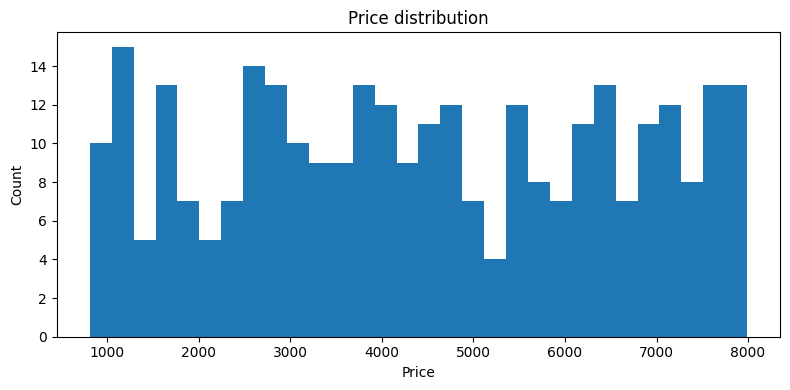

In [ ]:
# 6.2 Price distribution (histogram) - numeric check
if 'price' in df_clean.columns:
    plt.figure(figsize=(8,4))
    plt.hist(df_clean['price'].dropna(), bins=30)
    plt.title('Price distribution')
    plt.xlabel('Price')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig(os.path.join(OUT_DIR, 'price_histogram.png'))
    print('Saved: price_histogram.png ->', os.path.join(OUT_DIR, 'price_histogram.png'))
    plt.show()
else:
    print('No price column found.')

/tmp/ipython-input-3645797888.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=groups.index, showfliers=False)


Saved: price_by_roomtype_boxplot.png -> /mnt/data/vois_airbnb_outputs/price_by_roomtype_boxplot.png


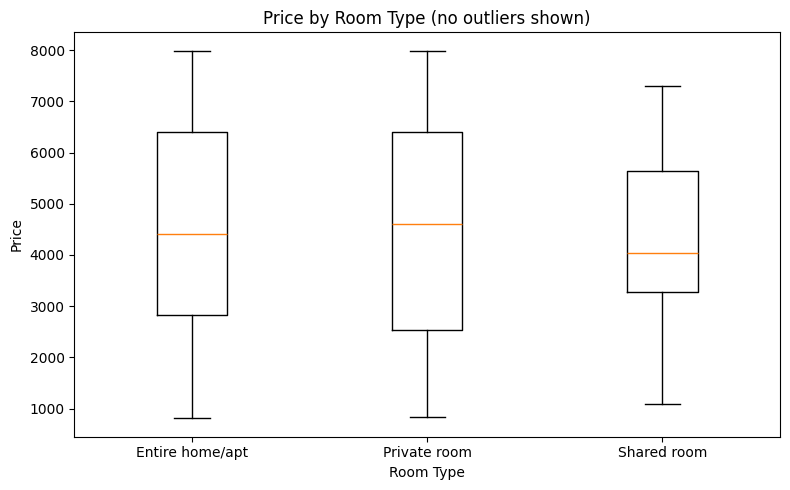

In [ ]:
# 6.3 Boxplot of price by room_type (if both columns exist)
if set(['price','room_type']).issubset(df_clean.columns):
    plt.figure(figsize=(8,5))
    # prepare data
    groups = df_clean.groupby('room_type')['price'].apply(list)
    # create boxplots
    plt.boxplot(groups, labels=groups.index, showfliers=False)
    plt.title('Price by Room Type (no outliers shown)')
    plt.xlabel('Room Type')
    plt.ylabel('Price')
    plt.tight_layout()
    plt.savefig(os.path.join(OUT_DIR, 'price_by_roomtype_boxplot.png'))
    print('Saved: price_by_roomtype_boxplot.png ->', os.path.join(OUT_DIR, 'price_by_roomtype_boxplot.png'))
    plt.show()
else:
    print('Required columns for boxplot not found.')

Saved: correlation_matrix.png -> /mnt/data/vois_airbnb_outputs/correlation_matrix.png


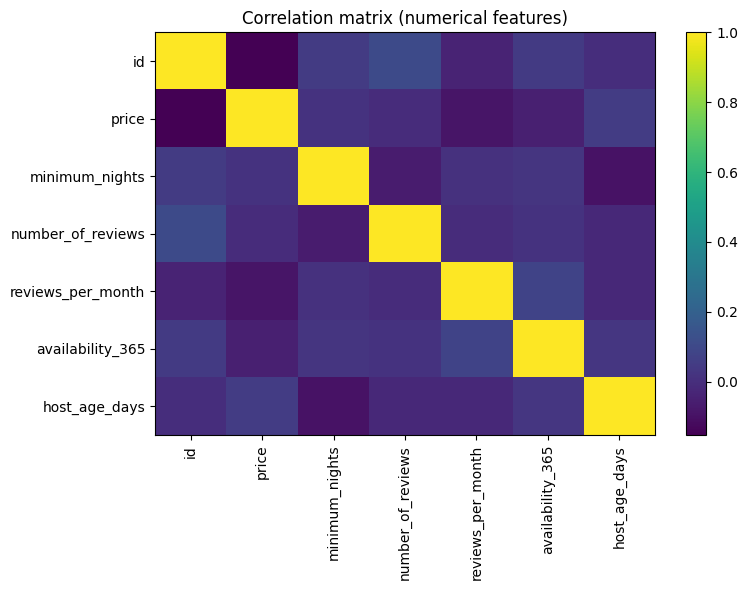

In [ ]:
# 6.4 Correlation heatmap for numerical columns
num = df_clean.select_dtypes(include=[np.number])
if num.shape[1] >= 2:
    corr = num.corr()
    plt.figure(figsize=(8,6))
    plt.imshow(corr, aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.index)), corr.index)
    plt.title('Correlation matrix (numerical features)')
    plt.tight_layout()
    plt.savefig(os.path.join(OUT_DIR, 'correlation_matrix.png'))
    print('Saved: correlation_matrix.png ->', os.path.join(OUT_DIR, 'correlation_matrix.png'))
    plt.show()
else:
    print('Not enough numerical columns for correlation matrix.')

###7. Grouped Analysis & Insights
Examples: average price by city and room type, busiest months (if dates available).

In [ ]:
# 7.1 Average price by category (city or neighbourhood-like)
if cat_col and 'price' in df_clean.columns:
    avg_price = df_clean.groupby(cat_col)['price'].mean().sort_values(ascending=False).head(10)
    print('Average price by', cat_col)
    display(avg_price)
    # Save to CSV for PPT use
    avg_price.to_csv(os.path.join(OUT_DIR, 'avg_price_by_category.csv'))
    print('Saved: avg_price_by_category.csv ->', os.path.join(OUT_DIR, 'avg_price_by_category.csv'))
else:
    print('Cannot compute avg price by category - missing columns.')


Average price by city


,price
city,
CityC,4794.649123
CityB,4448.284091
CityA,4319.670968


Saved: avg_price_by_category.csv -> /mnt/data/vois_airbnb_outputs/avg_price_by_category.csv


Saved: reviews_vs_price_scatter.png -> /mnt/data/vois_airbnb_outputs/reviews_vs_price_scatter.png


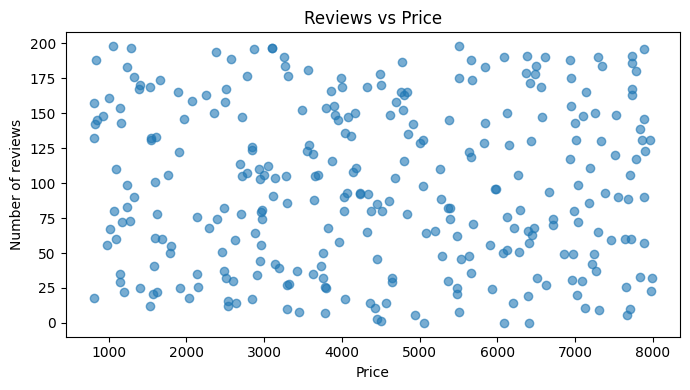

In [ ]:
# 7.2 Reviews vs Price scatter (if available)
if set(['price','number_of_reviews']).issubset(df_clean.columns):
    plt.figure(figsize=(7,4))
    plt.scatter(df_clean['price'], df_clean['number_of_reviews'], alpha=0.6)
    plt.xlabel('Price')
    plt.ylabel('Number of reviews')
    plt.title('Reviews vs Price')
    plt.tight_layout()
    plt.savefig(os.path.join(OUT_DIR, 'reviews_vs_price_scatter.png'))
    print('Saved: reviews_vs_price_scatter.png ->', os.path.join(OUT_DIR, 'reviews_vs_price_scatter.png'))
    plt.show()
else:
    print('Required columns for reviews vs price not found.')

###8. Time-based analysis (if date or last_review exists)
Look at bookings/reviews over time if possible.

Saved: monthly_review_counts.png -> /mnt/data/vois_airbnb_outputs/monthly_review_counts.png


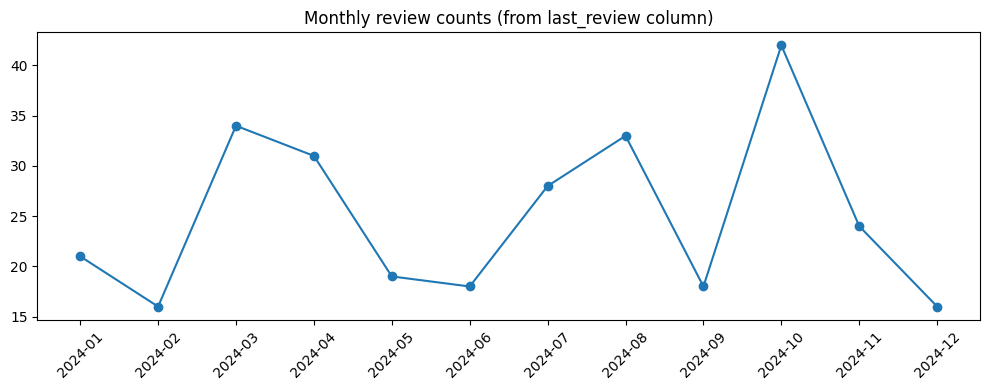

In [ ]:
if 'last_review' in df_clean.columns:
    df_time = df_clean.dropna(subset=['last_review']).copy()
    df_time['review_date'] = pd.to_datetime(df_time['last_review'], errors='coerce')
    df_time = df_time.dropna(subset=['review_date'])
    df_time['review_month'] = df_time['review_date'].dt.to_period('M').astype(str)
    monthly_counts = df_time['review_month'].value_counts().sort_index()
    plt.figure(figsize=(10,4))
    plt.plot(monthly_counts.index, monthly_counts.values, marker='o')
    plt.xticks(rotation=45)
    plt.title('Monthly review counts (from last_review column)')
    plt.tight_layout()
    plt.savefig(os.path.join(OUT_DIR, 'monthly_review_counts.png'))
    print('Saved: monthly_review_counts.png ->', os.path.join(OUT_DIR, 'monthly_review_counts.png'))
    plt.show()
else:
    print('No last_review column for time-based analysis.')

###9. Save cleaned dataset and sample results for PPT
We'll save some CSVs and the top images for inclusion in your PPT slides.

In [ ]:
# Export cleaned dataset and a small summary for PPT
cleaned_path = os.path.join(OUT_DIR, 'airbnb_cleaned.csv')
df_clean.to_csv(cleaned_path, index=False)
print('Saved cleaned dataset to', cleaned_path)

# Create a small summary file
summary = {
    'rows_original': int(df.shape[0]),
    'rows_cleaned': int(df_clean.shape[0]),
    'columns': list(df_clean.columns),
}
import json
with open(os.path.join(OUT_DIR, 'summary.json'), 'w') as f:
    json.dump(summary, f, indent=2)
print('Saved summary.json ->', os.path.join(OUT_DIR, 'summary.json'))


Saved cleaned dataset to /mnt/data/vois_airbnb_outputs/airbnb_cleaned.csv
Saved summary.json -> /mnt/data/vois_airbnb_outputs/summary.json


###10. Example Insights (write these into your PPT slide)

*   Top 3 neighbourhoods by number of listings
*   Average price range and outlier behaviour
*   Relationship between reviews and price
*   Seasonal trends in reviews/bookings (if present)
        
> Paste at least 3 result screenshots from the vois_airbnb_outputs folder into your PPT.

In [ ]:
# Show files saved into output for easy reference
for f in sorted(os.listdir(OUT_DIR)):
    print('-', f)

- airbnb_cleaned.csv
- avg_price_by_category.csv
- correlation_matrix.png
- monthly_review_counts.png
- price_by_roomtype_boxplot.png
- price_histogram.png
- reviews_vs_price_scatter.png
- summary.json
- synthetic_airbnb_sample.csv
